# Week7 - Tree Assignment

- Load the breast cancer dataset using datasets.load_breast_cancer()
- Use scatter plots to look at the data (use different colors for the classes)
- Use box plots to look at the data 
- create a training and test set with random_state = 3
- train a decision tree model on the training set.
- train a logistic regression model on the training set
- train a random forest model on the training set
- Which model performed better?
- Which features were most relevant in each model (a part from random forest)?
- Use grid search to improve performance on the best performed model

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [ ]:
#Load the breast cancer dataset using datasets.load_breast_cancer()
breast_cancer_data = load_breast_cancer()
dataframe = pd.DataFrame(data=breast_cancer_data['data'], columns=breast_cancer_data['feature_names'])

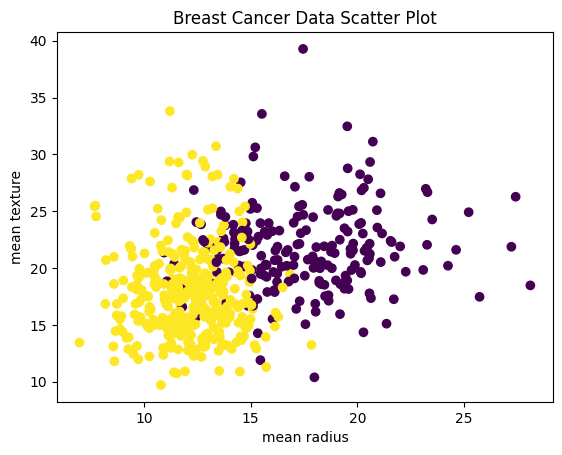

In [ ]:
plt.scatter(dataframe.iloc[:, 0], dataframe.iloc[:, 1], c=breast_cancer_data['target'], cmap='viridis')
plt.xlabel(breast_cancer_data['feature_names'][0])
plt.ylabel(breast_cancer_data['feature_names'][1])
plt.title("Breast Cancer Data Scatter Plot")
plt.show()

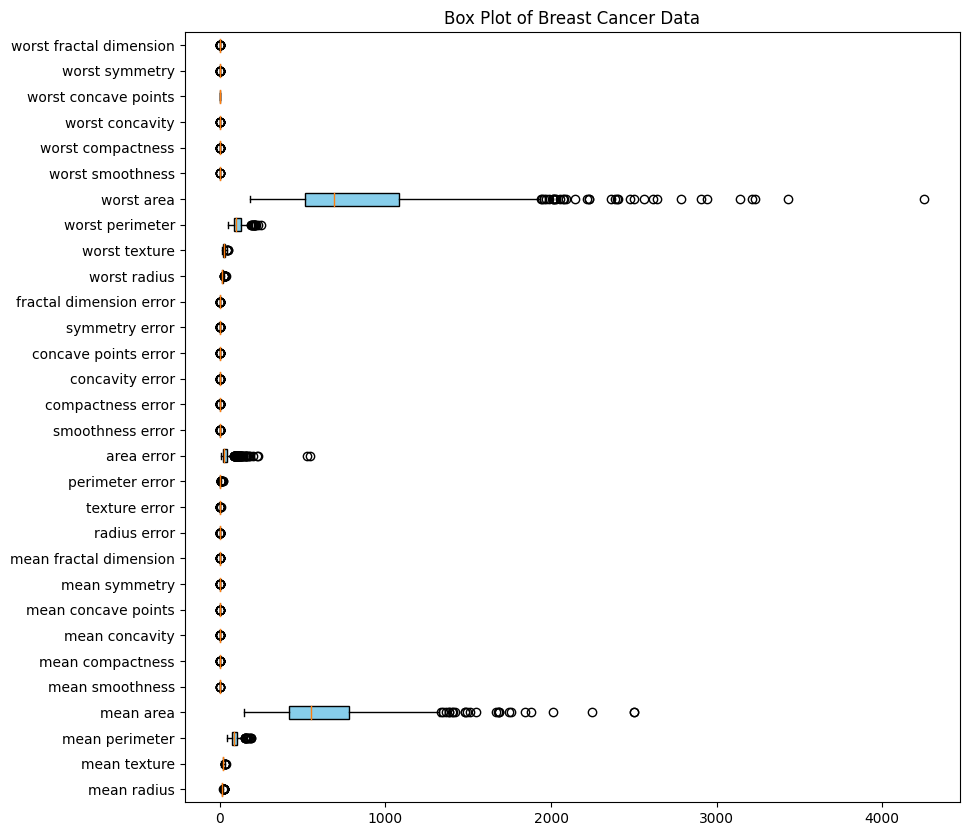

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(dataframe, vert=False, patch_artist=True, labels=breast_cancer_data['feature_names'], boxprops=dict(facecolor='skyblue'))
ax.set_title("Box Plot of Breast Cancer Data")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data['data'], breast_cancer_data['target'], test_size=0.2, random_state=3)

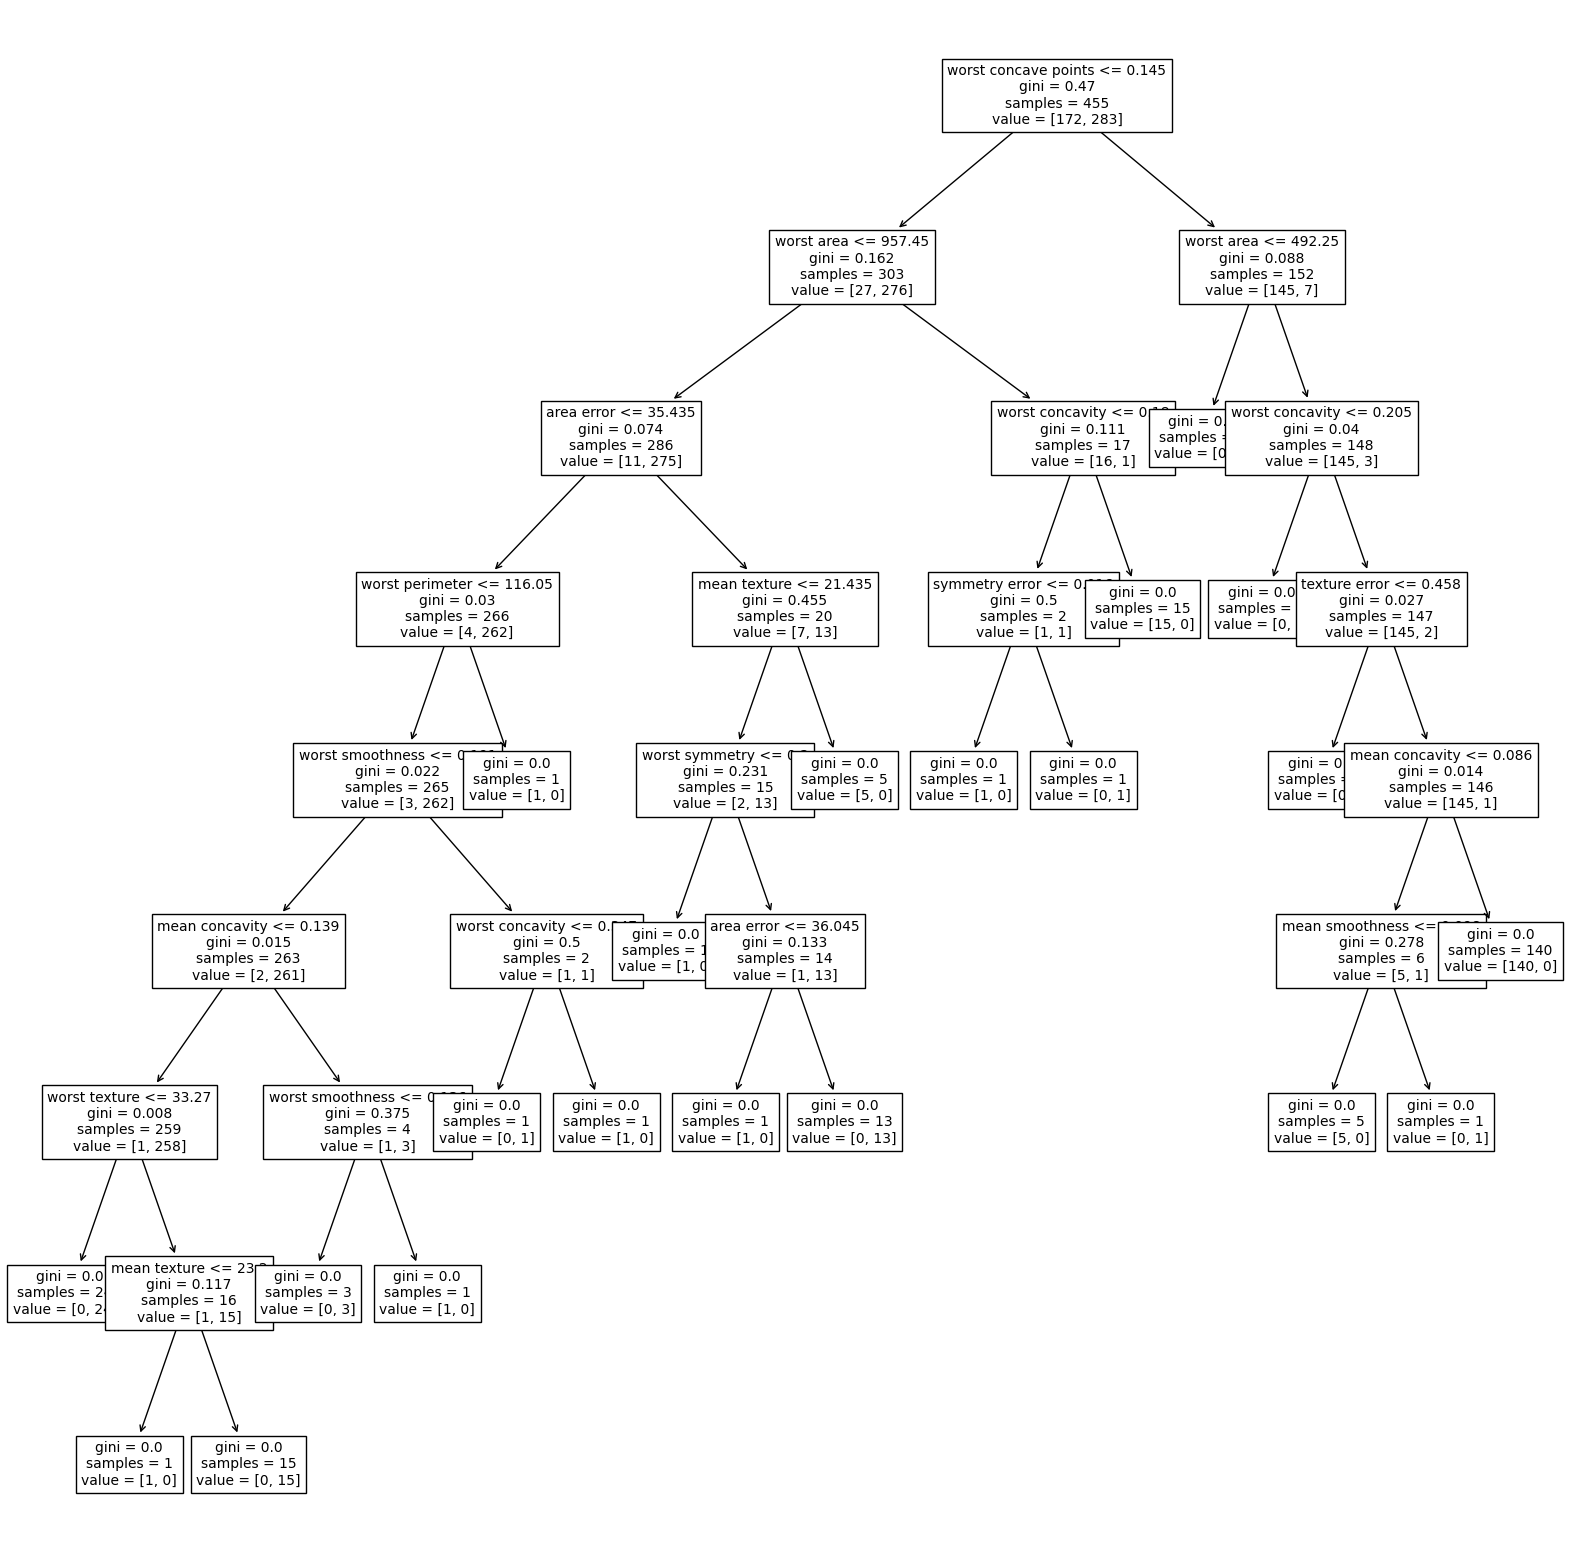

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

dtModel = DecisionTreeClassifier(random_state=5)

dtModel.fit(X_train, y_train)

plt.figure(figsize=(20,20))
tree.plot_tree(dtModel, feature_names=breast_cancer_data['feature_names'], fontsize=10)
plt.show()

In [ ]:
dtModel = DecisionTreeClassifier(random_state=4)
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [ ]:
print("The accuracy score is : ", dtModel.score(X_test,y_test))

The accuracy score is :  0.8859649122807017


In [ ]:
#Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression(random_state=3)
logisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3)

In [ ]:
print("The accuracy score is : ", logisticRegressionModel.score(X_test,y_test))


The accuracy score is :  0.9122807017543859


In [ ]:
#Train a Random Forest model on the training set
from sklearn.ensemble import RandomForestClassifier
rdModel = RandomForestClassifier(random_state=3)
rdModel.fit(X_train, y_train)
print("The accuracy score is : ", rdModel.score(X_test,y_test))


The accuracy score is :  0.9385964912280702


Random forest model performed better with 93 percent accuracy

In [ ]:

for index,jvalue in zip(breast_cancer_data['feature_names'], dtModel.feature_importances_):
    print(index, ":", jvalue)

mean radius : 0.0
mean texture : 0.03509215698359219
mean perimeter : 0.0
mean area : 0.0
mean smoothness : 0.0
mean compactness : 0.0
mean concavity : 0.0014938962728483962
mean concave points : 0.0022308037773337503
mean symmetry : 0.0046737611964828675
mean fractal dimension : 0.0
radius error : 0.0
texture error : 0.009033446328006308
perimeter error : 0.007522529925767663
area error : 0.019508965836400608
smoothness error : 0.0
compactness error : 0.008679842222039614
concavity error : 0.01168440299120717
concave points error : 0.0
symmetry error : 0.0
fractal dimension error : 0.0
worst radius : 0.04273477594721499
worst texture : 0.0005481293295103351
worst perimeter : 0.009102728431589437
worst area : 0.1222278275861887
worst smoothness : 0.0044984658127737946
worst compactness : 0.0
worst concavity : 0.013281099106189067
worst concave points : 0.7076871682528552
worst symmetry : 0.0
worst fractal dimension : 0.0


In [ ]:
#Create a grid search for the random forest model
from sklearn.model_selection import GridSearchCV
grid_dict = {
    'n_estimators': [50, 80, 100, 120],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 8],
    'max_features': ['auto', 'sqrt']
}
gridSearchCV = GridSearchCV(rdModel, param_grid=grid_dict, cv=5)
gridSearchCV.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 8],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [50, 80, 100, 120]})

In [ ]:
gridSearchCV.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}